In [11]:
%matplotlib inline
import pandas as pd
data = pd.read_excel("ActualRatings_weeklyGRP.xls", sheet_name='TVRating_Data', index_col=0)
data.head()

,GRP
GRPRatingsDate,
17-Jun-2007 (25),243.60
24-Jun-2007 (26),263.19
01-Jul-2007 (27),269.89
08-Jul-2007 (28),252.88
15-Jul-2007 (29),303.46


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [12]:
data.index = data.index.str[:11]

In [13]:
data.index = pd.to_datetime(data.index)

In [14]:
data.columns

Index(['GRP'], dtype='object')

In [15]:
import plotly

In [16]:
plotly.tools.set_credentials_file(username='81santi81', api_key='YrIPfoUSq1ESCQ99NVNh')

In [17]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()
plot_mpl(fig)

'https://plot.ly/~81santi81/2'

In [19]:
data.head()

,GRP
GRPRatingsDate,
2007-06-17,243.60
2007-06-24,263.19
2007-07-01,269.89
2007-07-08,252.88
2007-07-15,303.46


In [21]:
ts = data['GRP'] 
ts.head(10)

GRPRatingsDate
2007-06-17    243.60
2007-06-24    263.19
2007-07-01    269.89
2007-07-08    252.88
2007-07-15    303.46
2007-07-22    286.29
2007-07-29    292.28
2007-08-05    288.72
2007-08-12    285.70
2007-08-19    286.01
Name: GRP, dtype: float64

In [23]:
#1. Specific the index as a string constant:
ts['2007-06-17']

243.6

In [25]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2007,6,17)]

243.6

In [ ]:
ts['1949']

In [26]:
#2. Use ':' if one of the indices is at ends:
training = ts[:'2008-10-26']

In [28]:
training.size

72

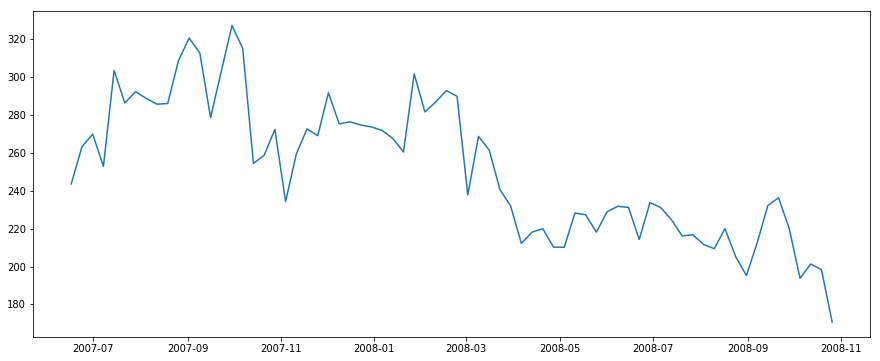

In [33]:
plt.plot(training)

In [41]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

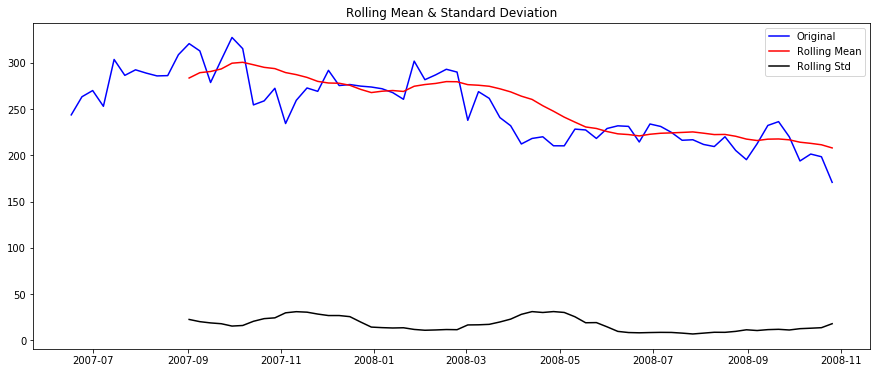

Results of Dickey-Fuller Test:
Test Statistic                 -0.521883
p-value                         0.887675
#Lags Used                      2.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [42]:
test_stationarity(training)

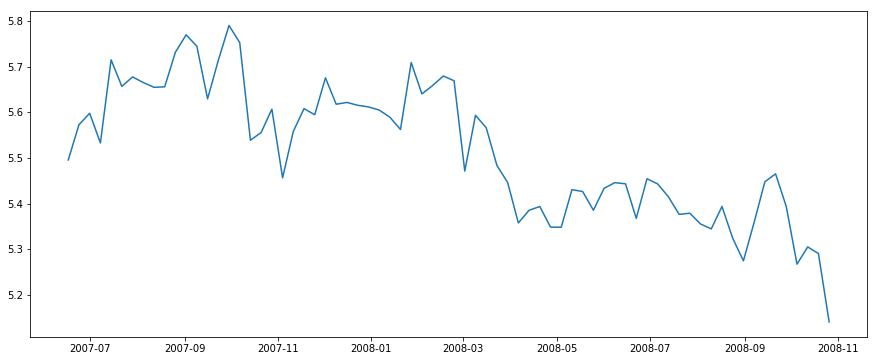

In [47]:
ts_log = np.log(training)
plt.plot(ts_log)